In [1]:
%matplotlib inline
# Import libraies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

Training and validation dataset
     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0  2.539054  4.346746   78  2.332352    0 -1.393579        7     10  3.435599
1 -0.017083  3.211816   63 -1.392447    0 -0.790421        6      0  2.047693
2 -0.991411  3.318198   58 -1.379746    0 -1.389900        6      0 -0.162519
3  3.148832  3.273796   68 -0.059287    1  2.423715        7     50  3.337547
4  1.281664  4.290029   66  2.117571    0 -1.393860        7     15  2.718001


Histogram of dataset


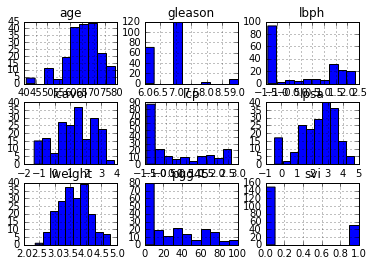



Testing data 
     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0  0.748683  3.474706   64  0.609112    0 -1.378343        6      0  0.765468
1  3.153745  3.514460   59 -1.380581    0 -1.377580        7      5  2.704711
2  3.165408  3.525971   59 -1.380834    0 -1.379024        7      5  2.704711
3  1.741532  3.508319   43 -1.392266    0 -1.390943        6      0  2.591516
4  1.765385  3.888884   61 -1.380693    0  0.804053        7      6  2.374906


In [2]:
# Import dataset
df = pd.read_csv("1-prostate-training-data.csv")  # , delim_whitespace = True)
print("Training and validation dataset")
print(df.head(5))
df.describe()

print("\n\nHistogram of dataset")
df.hist()
plt.show()

names = df.columns
df_test = pd.read_csv("20145087-test.csv", names=names)
print("\n\nTesting data ")
print(df_test.head(5))

In [3]:
# Prepare data for training
print("\n\n--------------------DATA-------------------------")
X = df.loc[:, "lcavol": "pgg45"]
y = df.iloc[:, 8:]
# print(X_train)
X = X.as_matrix()
y = y.as_matrix()
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1)
print(Xbar.shape)
print(Xbar[: 5, :])
print(y.shape)
print(y[: 5, :])

print("\n\n------------------Validation DATA-------------------------")
test_size = 0.2
seed = 7
Xbar_train, Xbar_val, y_train, y_val = train_test_split(Xbar, y, test_size=test_size,
                                                        random_state=seed)
print(Xbar_val.shape)
print(Xbar_val[: 5, :])
print(y_val.shape)
print(y_val[: 5, :])

print("\n\n------------------Testing DATA-------------------------")
# # Data for testing
X_test = df_test.iloc[: 5, : 8]
y_test = df_test.iloc[: 5, 8:]
y_test = y_test.as_matrix()
X_test = X_test.as_matrix()
#one_test = np.ones((X_test.shape[0], 1))
Xbar_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
print(Xbar_test.shape)
print(Xbar_test)
print(y_test.shape)
print(y_test)

print("\n\n------------------Real DATA-------------------------")
# Real data
X_real = df_test.iloc[5:, : 8]
X_real = X_real.as_matrix()
Xbar_real = np.hstack((np.ones((X_real.shape[0], 1)), X_real))
print(Xbar_real.shape)
print(Xbar_real)



--------------------DATA-------------------------
(200, 9)
[[  1.00000000e+00   2.53905372e+00   4.34674650e+00   7.80000000e+01
    2.33235214e+00   0.00000000e+00  -1.39357908e+00   7.00000000e+00
    1.00000000e+01]
 [  1.00000000e+00  -1.70829540e-02   3.21181618e+00   6.30000000e+01
   -1.39244664e+00   0.00000000e+00  -7.90421374e-01   6.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00  -9.91411354e-01   3.31819824e+00   5.80000000e+01
   -1.37974582e+00   0.00000000e+00  -1.38990019e+00   6.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   3.14883231e+00   3.27379555e+00   6.80000000e+01
   -5.92870560e-02   1.00000000e+00   2.42371489e+00   7.00000000e+00
    5.00000000e+01]
 [  1.00000000e+00   1.28166447e+00   4.29002889e+00   6.60000000e+01
    2.11757107e+00   0.00000000e+00  -1.39385984e+00   7.00000000e+00
    1.50000000e+01]]
(200, 1)
[[ 3.4355988]
 [ 2.0476928]
 [-0.1625189]
 [ 3.3375474]
 [ 2.7180005]]


------------------Validation DATA-----------------------

In [4]:
#Buil Model use Numpy
class RidgeRegression(object):

    def fit(self, Xbar, y, alpha=0):
        G = alpha * np.eye(Xbar.shape[1])
        G[0, 0] = 0  # Don't regularize bias
        self.weights = np.dot(np.linalg.inv(np.dot(Xbar.T, Xbar) + np.dot(G.T, G)),
                             np.dot(Xbar.T, y))

    def predict(self, Xbar):
        return np.dot(Xbar, self.weights)




-------------------Ridge Regression Numpy--------------------


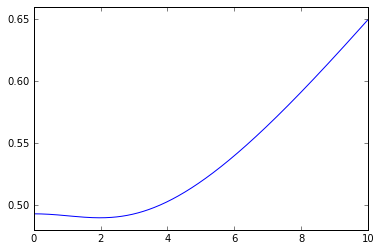

Best alpha value:  1.98
Min mean square error: 0.489691620501


In [5]:
print("\n\n-------------------Ridge Regression Numpy--------------------")
# Ridge Regression
alphas = np.array([])
mses = np.array([])
for i in np.arange(0, 10, .02):
    rr = RidgeRegression()  # , normalize=True)
    rr.fit(Xbar_train, y_train, alpha=i)
    predictions = rr.predict(Xbar_val)
    mse = np.mean((predictions - y_val)**2)
    alphas = np.append(alphas, i)
    mses = np.append(mses, mse)
    #print("mean square error:", mse)
plt.plot(alphas, mses)
plt.show()
alpha = alphas[np.argmin(mses)]
print("Best alpha value: ", alpha)
print("Min mean square error:", np.min(mses))

-------------------Linear Regression Sklearn--------------------
linear regression model weights: [[ 0.09688267  0.63502767  0.63559189 -0.01336291  0.1113942   0.24132024
  -0.11963027 -0.05245795  0.00895795]]
mean square error: 0.492889793574


-------------------Ridge Regression Sklearn--------------------


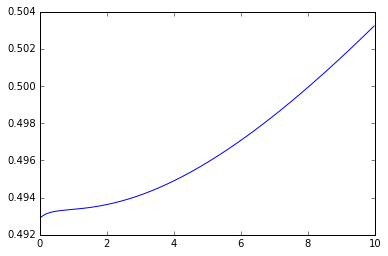

Best alpha value:  0.0
Min mean square error: 0.492889793575


In [6]:
# Train model use sklearn libray
# Linear Regression
print("-------------------Linear Regression Sklearn--------------------")
lm = LinearRegression(fit_intercept=False)
lm.fit(Xbar_train, y_train)
print("linear regression model weights:", lm.coef_)
predictions = lm.predict(Xbar_val)
mse = np.mean((predictions - y_val)**2)
print("mean square error:", mse)
print("\n\n-------------------Ridge Regression Sklearn--------------------")
# Ridge Regression
alphas_sk = np.array([])
mses = np.array([])
for i in np.arange(0, 10, .02):
    rr = Ridge(alpha=i, fit_intercept=False, normalize=True)
    rr.fit(Xbar_train, y_train)
    predictions = rr.predict(Xbar_val)
    mse = np.mean((predictions - y_val)**2)
    alphas_sk = np.append(alphas_sk, i)
    mses = np.append(mses, mse)
    #print("mean square error:", mse)
plt.plot(alphas_sk, mses)
plt.show()
idx = np.argmin(mses)
alpha_sk = alphas_sk[idx]
print("Best alpha value: ", alpha_sk)
print("Min mean square error:", np.min(mses))

In [7]:
# Test model used Numpy
rr = RidgeRegression()
rr.fit(Xbar_train, y_train, alpha=alpha)
predictions_rr = rr.predict(Xbar_test)
print("GT:", y_test.T)
print("RR:", predictions_rr.T)
print("MSE:", np.mean((predictions_rr - y_test)**2))

GT: [[ 0.7654678  2.7047113  2.7047113  2.5915164  2.3749058]]
RR: [[ 1.85567956  3.19105479  3.20477505  2.49943193  2.2970502 ]]
MSE: 0.337939294132


In [8]:
# Inference used Numpy
predictions_real = rr.predict(Xbar_real)
print("Ridge regression model weights W:\n", rr.weights)
print("\nPrediction values:\n", predictions_real)

Ridge regression model weights W:
 [[ 0.32528009]
 [ 0.62571003]
 [ 0.54823127]
 [-0.01178997]
 [ 0.12228858]
 [ 0.2069855 ]
 [-0.09881233]
 [-0.04985473]
 [ 0.0086013 ]]

Prediction values:
 [[ 2.69174308]
 [ 2.49789414]
 [ 2.30399461]
 [ 2.16338798]
 [ 1.79210342]]


In [9]:
# Test model & Inference of model using sklearn
rr_sk = Ridge(alpha=alpha_sk, fit_intercept=False)
rr_sk.fit(Xbar_train, y_train)
predictions_rr_sk = rr_sk.predict(Xbar_test)
print("GT:", y_test.T)
print("RR:", predictions_rr_sk.T)
print("MSE:", np.mean((predictions_rr_sk - y_test)**2))
predictions_real = rr_sk.predict(Xbar_real)
print("\nRidge regression model weights sklearn W:\n", rr_sk.coef_.T)
print("\nPrediction values sklearn :\n", predictions_real)

GT: [[ 0.7654678  2.7047113  2.7047113  2.5915164  2.3749058]]
RR: [[ 1.84358119  3.23354423  3.24841158  2.55461896  2.31110813]]
MSE: 0.348606858989

Ridge regression model weights sklearn W:
 [[ 0.09688267]
 [ 0.63502767]
 [ 0.63559189]
 [-0.01336291]
 [ 0.1113942 ]
 [ 0.24132024]
 [-0.11963027]
 [-0.05245795]
 [ 0.00895795]]

Prediction values sklearn :
 [[ 2.63799974]
 [ 2.55221036]
 [ 2.28552786]
 [ 2.13360667]
 [ 1.78910078]]
